# Superstore Sales Analysis

<p align="center">
  <img src="https://img.freepik.com/free-vector/people-supermarket-illustration-big-store-with-products_1284-51586.jpg" width = 100%>
</p>


## Project Overview

In pursue of knowledge and understanding of which products, regions, categories and customer segments a company should target or avoid, I search and selected an appropriate dataset on kaggle which will match a standard superstore requirement. With growing demands and cut-throat competitions in the market, companies are seeking ideas on how to optimize profits.





## Methodology

The project is carried out in the following steps:

1. Data Collection
2. Data Cleaning and Preparation
3. Exploratory Data Analysis
4. Visualization and Report
5. Decision Making (Insights)


## Project's Goals

At the end of this project, the insights will respond to the following questions:


- Which mode of shipping is preferable?
- Which customer segment is more profitable ?
- Which Region makes more profit?
- Which Category and sub-category makes the most sales?
- Which city is preferable for business?

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

## Data Collection

I start by loading the data in a dataframe in a csv using Python pandas library, followed by importing the required libraries and proceeded to prepare it for further analysis.

In [4]:
data_path = 'https://raw.githubusercontent.com/diogo-costa-silva/assets/main/data/Superstore.csv'
df = pd.read_csv(data_path, encoding='latin1')  # or encoding='cp1252'

After dataset imported, we can review the first five rows.

In [5]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


There are <b>categorical</b> and <b>numerical</b> data in this dataset.

Categorical Columns:
- Order Date 
- Ship Date 
- Ship mode 
- Segment 
- City 
- State 
- Region 
- Category 
- Subcategory

Numerical Columns: 
- Quantity 
- Sales 
- Profit, and 
- Discount

## Understanding the data

The next step is to get more information about the dataset using the `df.info()` and `df.shape()` functions.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.shape

(9994, 21)

There are <b>10,296 rows</b> including the header and <b>21 columns</b>. The data type is correct and matches the corresponding values. We can also observe that the columns are well spelled and aligned.

## Data Cleaning

Cleaning the data involves manipulating, removing duplicates and handling null/missing values in the dataset.

### Null Values and Spelling Checks

For now, let’s take a look whether there is <b>missing data</b>. 
The table below shows that there are not any missing data. These values are known as null values.

In [9]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Duplicate Values

Checking for duplicates returns 0, meaning there are no duplicates rows in the dataset.

In [10]:
df.duplicated().sum()

0

### Irrelevant Columns

For this section, we will have to get rid of the less important columns. The Row ID is not needed, so we drop it.

Next section we will explore correlation among columns.



In [11]:
#Dropping  Row ID column and assigning to df
df=df.drop('Row ID',axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Exploratory Data Analysis

At this point, the dataset is ready to go, we can proceed with the exploratory data analysis and get the data insights from the dataset. The goal is to perform a deep dive analysis on each major column. we have to understand the customer behavior such as order date by week/month, which segment a costumer belongs to (customer’s type), which product category is most chosen, etc.

/var/folders/6x/sp_vy0g12kv_vw9114lrmss40000gn/T/ipykernel_6770/398648332.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn', lw = 8, linecolor = 'white');


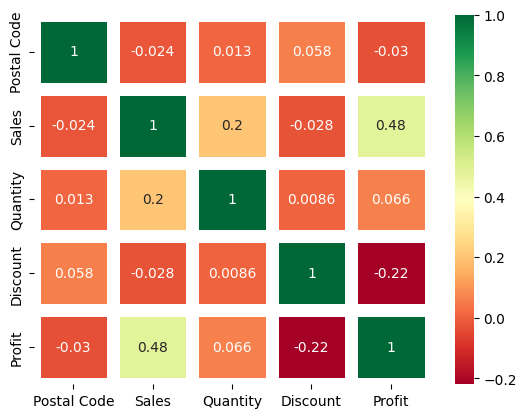

In [12]:
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn', lw = 8, linecolor = 'white');

We can notice sales is fairly related to profit and discount is negatively related to profit, which means higher sales and lesser discounts leads to more profit. Also, postal code has nothing to do with overall profit

### Univariate Analysis
Here, we will check one variable at a time by counting the occurrences.



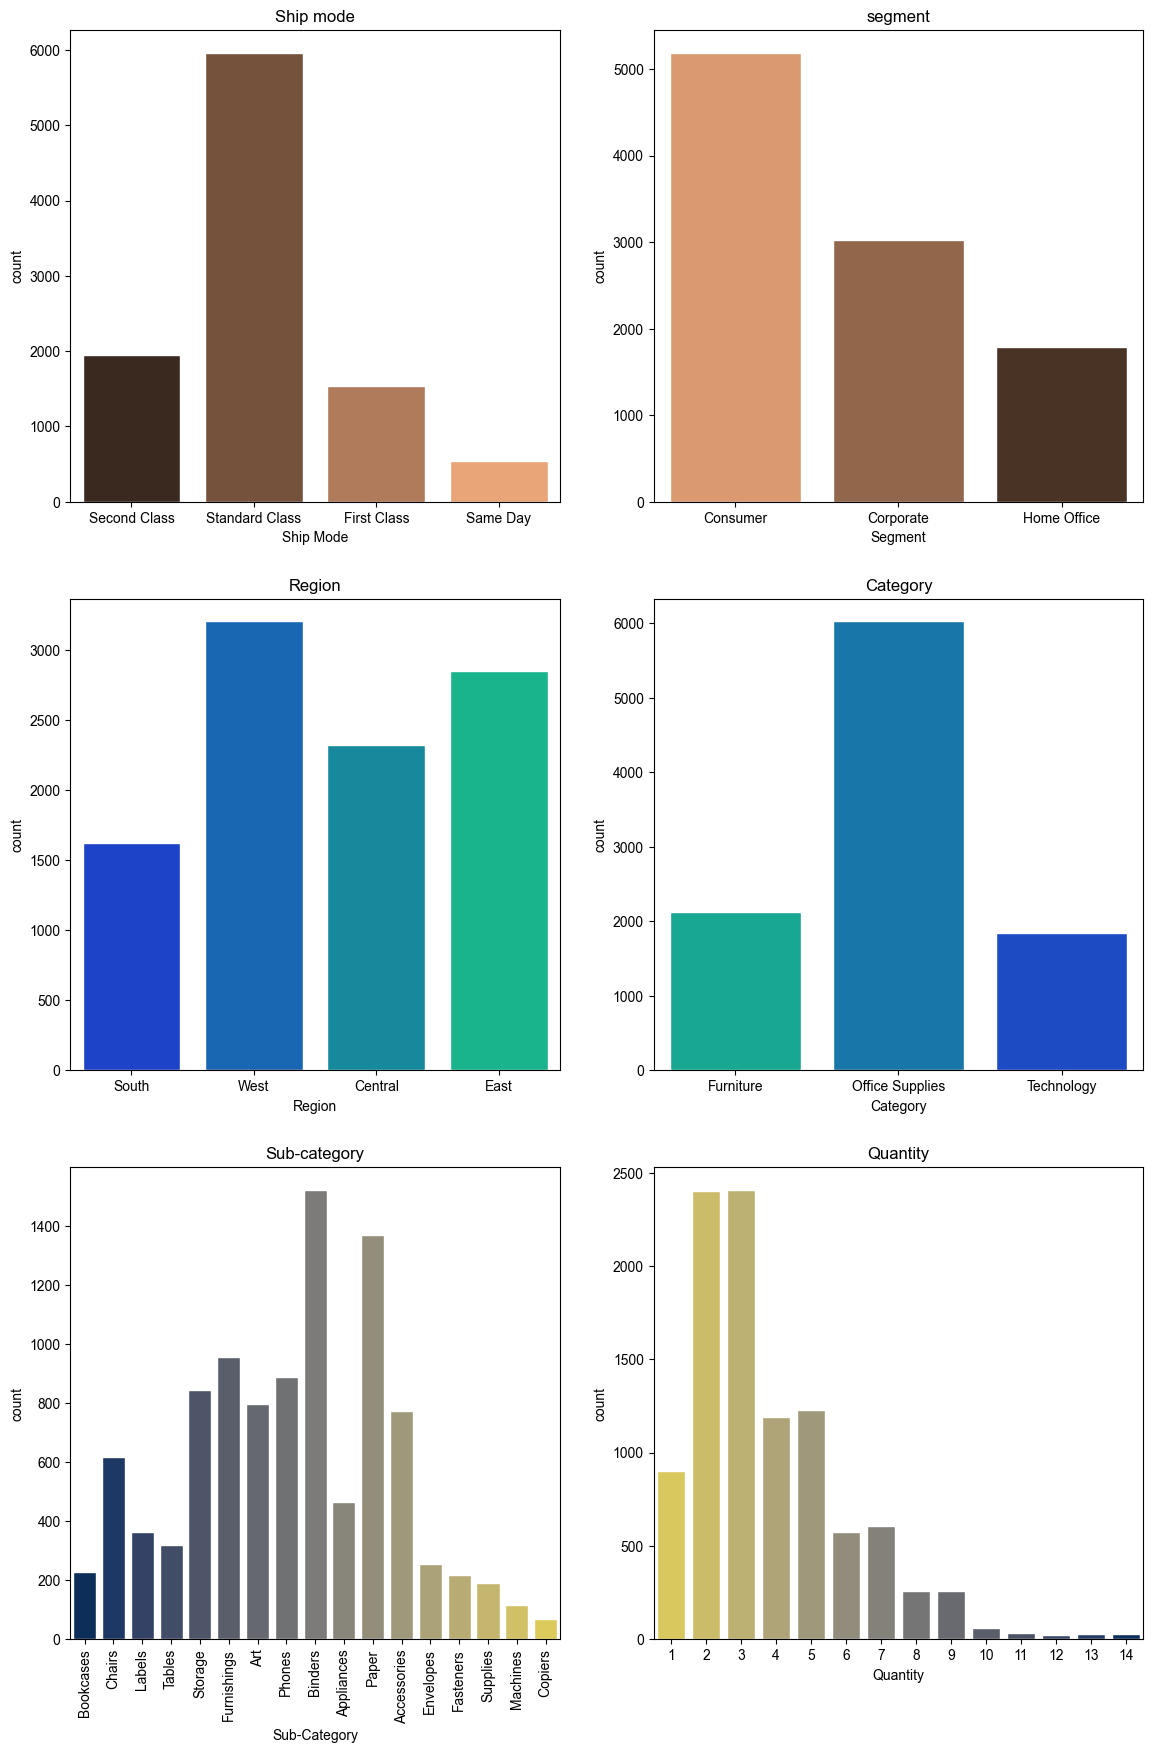

In [13]:
fig, axes = plt.subplots(3,2, figsize = (12,18))
sns.set_theme(style="darkgrid")
axes[0,0].set_title("Ship mode")
axes[0,1].set_title("segment")
axes[1,0].set_title("Region")
axes[1,1].set_title("Category")
axes[2,0].set_title("Sub-category")
axes[2,1].set_title("Quantity")

sns.countplot(x=df['Ship Mode'],
              palette = 'copper',
              orient='h',
              ax=axes[0,0])

sns.countplot(x=df['Segment'],
              palette = 'copper_r',
              orient='h',
              ax=axes[0,1])

sns.countplot(x=df['Region'],
              palette = 'winter',
              orient='h',
              ax=axes[1,0])

sns.countplot(x=df['Category'],
              palette = 'winter_r',
              orient='h',
              ax=axes[1,1])

sns.countplot(x=df['Sub-Category'],
              palette = 'cividis',
              orient='h',
              ax=axes[2,0])

sns.countplot(x=df['Quantity'],
              palette = 'cividis_r',
              orient='h',
              ax=axes[2,1])

axes[2,0].set_xticklabels(list(df['Sub-Category'].unique()), rotation=90)

plt.tight_layout(pad=2);

- Standard class ship-mode is more preferred.
- Consumer is the majority segment.
- Superstores are more in west and least in south
- In category-wise, office supplies holds the majority.
- Top-selling sub-categories are binders, paper.
- People mostly go for 2 or 3 quantities.

<AxesSubplot: xlabel='Segment', ylabel='count'>

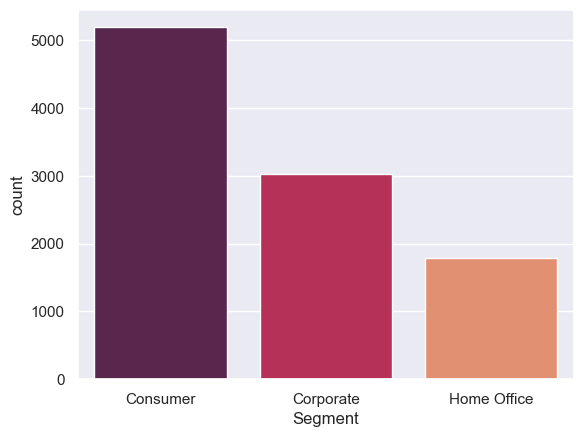

In [23]:
sns.countplot(x=df['Segment'],palette='rocket')

<AxesSubplot: title={'center': 'Most Popular Category'}>

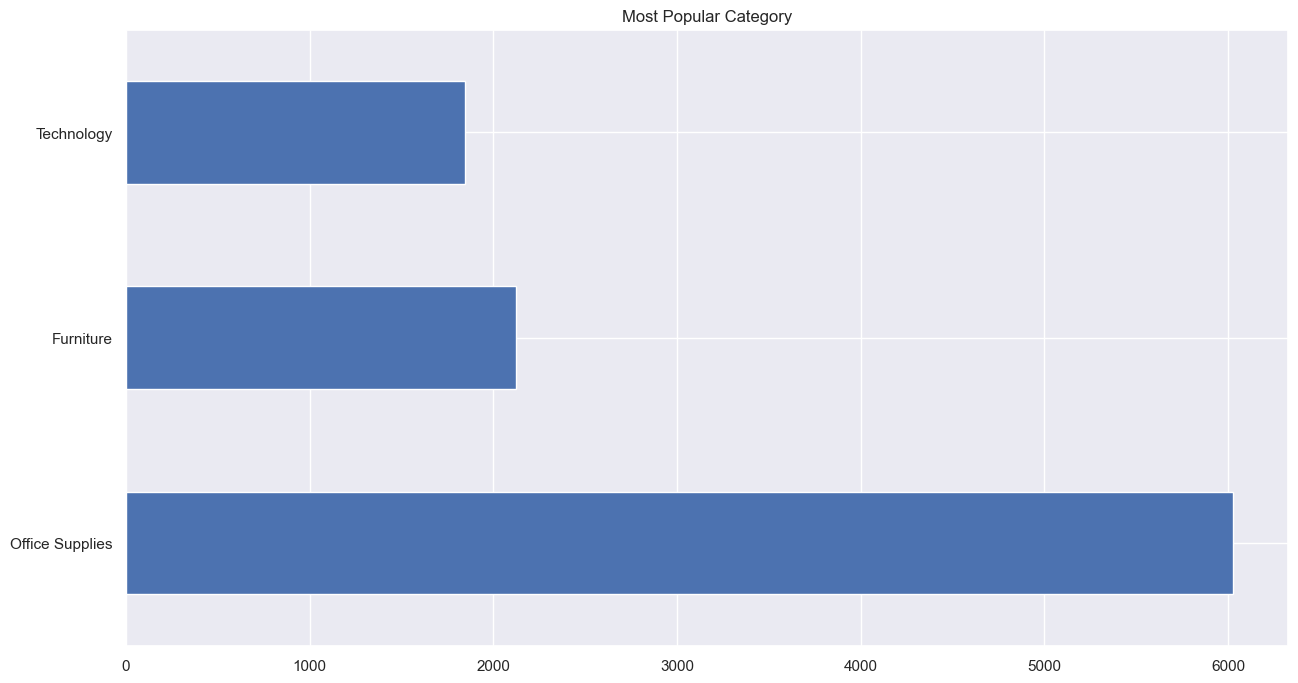

In [24]:
sns.set(rc = {'figure.figsize':(15,8)})

df['Category'].value_counts().plot(kind='barh',title='Most Popular Category')

<AxesSubplot: xlabel='Ship Mode', ylabel='count'>

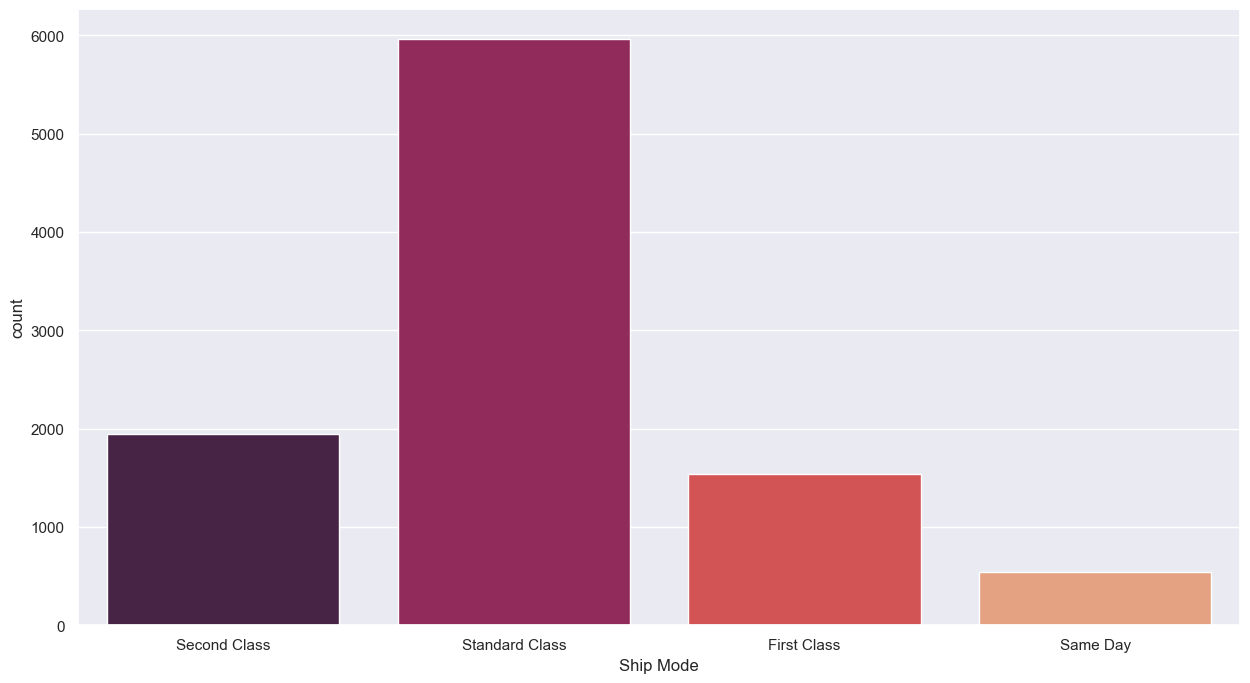

In [25]:
sns.countplot(x=df['Ship Mode'],palette='rocket')

<AxesSubplot: xlabel='Segment', ylabel='count'>

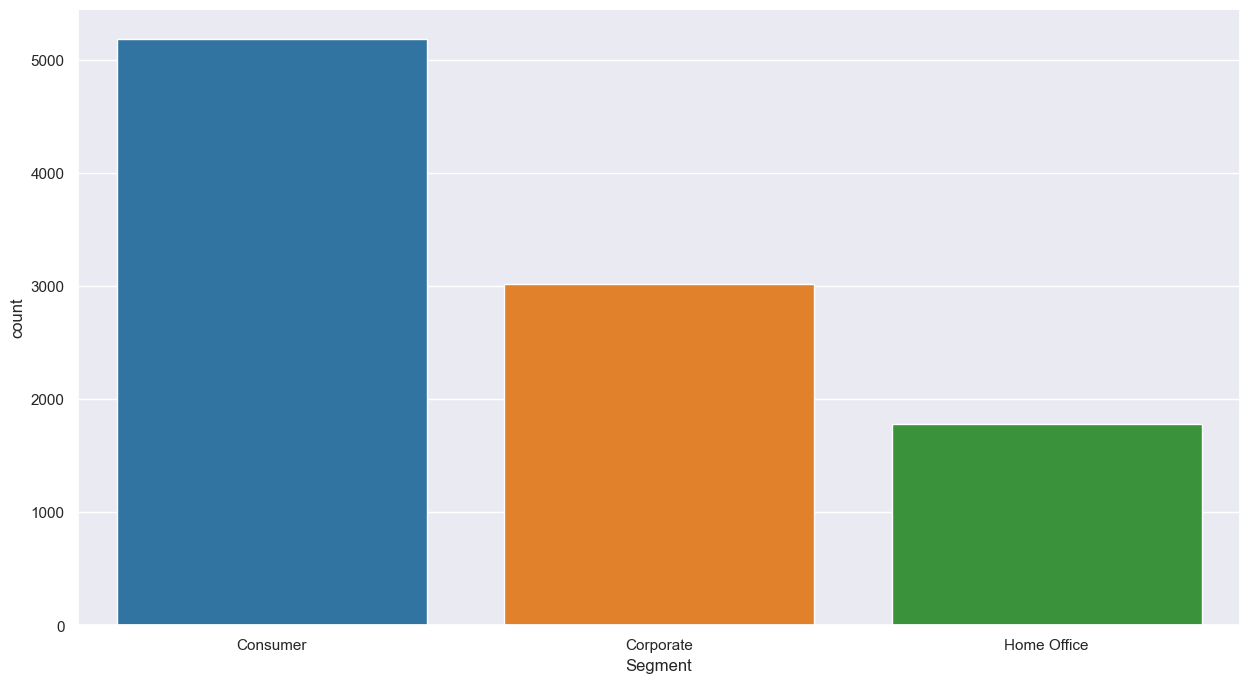

In [26]:
sns.countplot(x='Segment', data=df, palette='tab10')

<AxesSubplot: xlabel='Ship Mode', ylabel='count'>

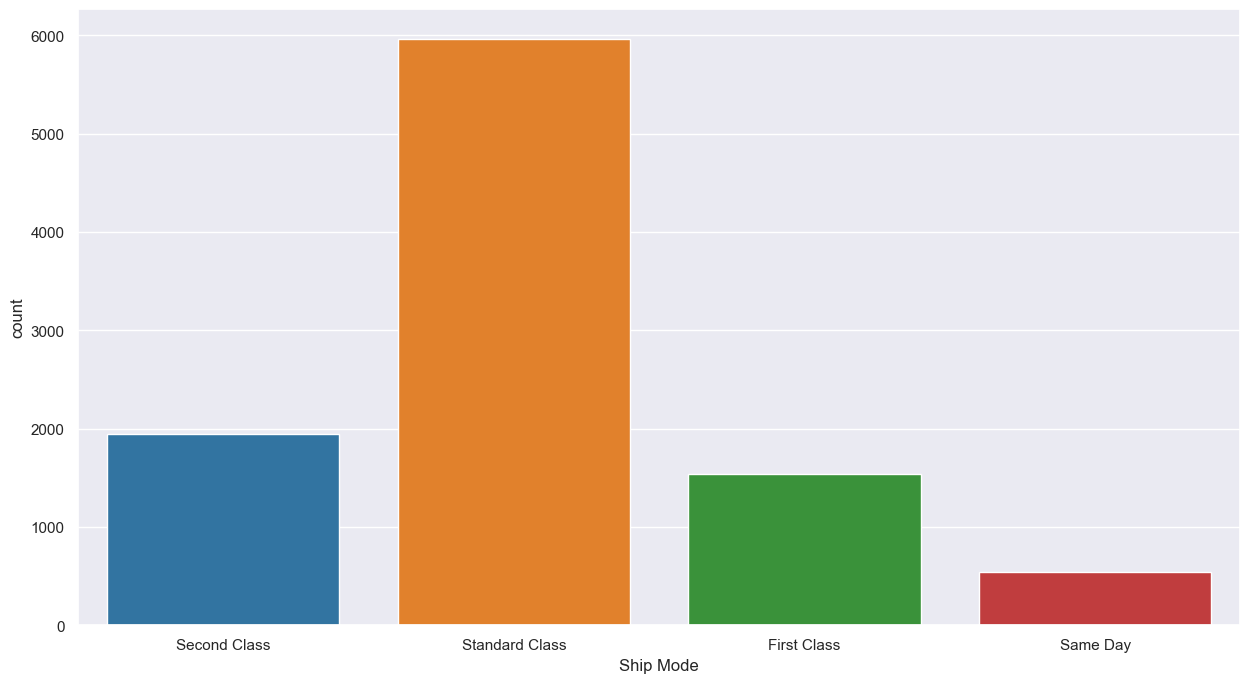

In [27]:
sns.countplot(x='Ship Mode', data=df, palette='tab10')

### Bivariate Analysis
Let us compare other features to <b>profit</b>, <b>sales</b> and <b>quantities</b> to visually identify what influence the <b>profit</b> most.

#### Which mode of shipping is preferable?

In [14]:
ship_df = pd.DataFrame(df.groupby(['Ship Mode'])[['Profit','Sales', 'Quantity']].sum())
ship_df

,Profit,Sales,Quantity
Ship Mode,,,
First Class,48969.8399,3.514284e+05,5693
Same Day,15891.7589,1.283631e+05,1960
Second Class,57446.6354,4.591936e+05,7423
Standard Class,164088.7875,1.358216e+06,22797


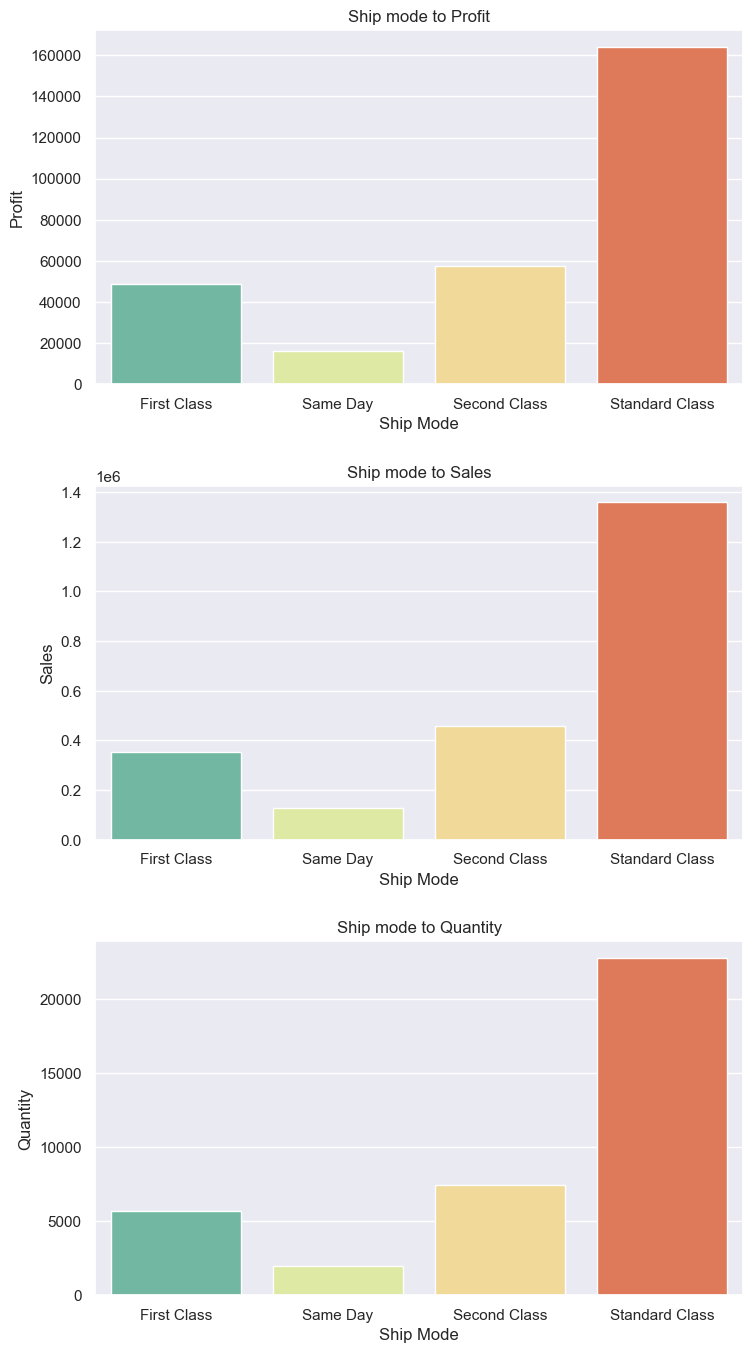

In [15]:
fig, axes = plt.subplots(3,1, figsize=(8,14))
sns.set_theme(style="darkgrid")
axes[0].set_title("Ship mode to Profit")
axes[1].set_title("Ship mode to Sales")
axes[2].set_title("Ship mode to Quantity")

sns.barplot(x=ship_df.index,
           y=ship_df['Profit'],
           data= ship_df,
            palette = 'Spectral_r',
           ax = axes[0]);

sns.barplot(x=ship_df.index,
           y=ship_df['Sales'],
           data= ship_df,
            palette = 'Spectral_r',
           ax = axes[1]);

sns.barplot(x=ship_df.index,
           y=ship_df['Quantity'],
           data= ship_df,
            palette = 'Spectral_r',
           ax = axes[2])

plt.tight_layout(pad=2);

Standard class ship-mode is more preferred. Maybe it is cheap and efficient.

#### Which customer segment is more profitable ?

In [16]:
segment_df = pd.DataFrame(df.groupby(['Segment'])[['Profit', 'Sales', 'Quantity']].sum())
segment_df

,Profit,Sales,Quantity
Segment,,,
Consumer,134119.2092,1.161401e+06,19521
Corporate,91979.1340,7.061464e+05,11608
Home Office,60298.6785,4.296531e+05,6744


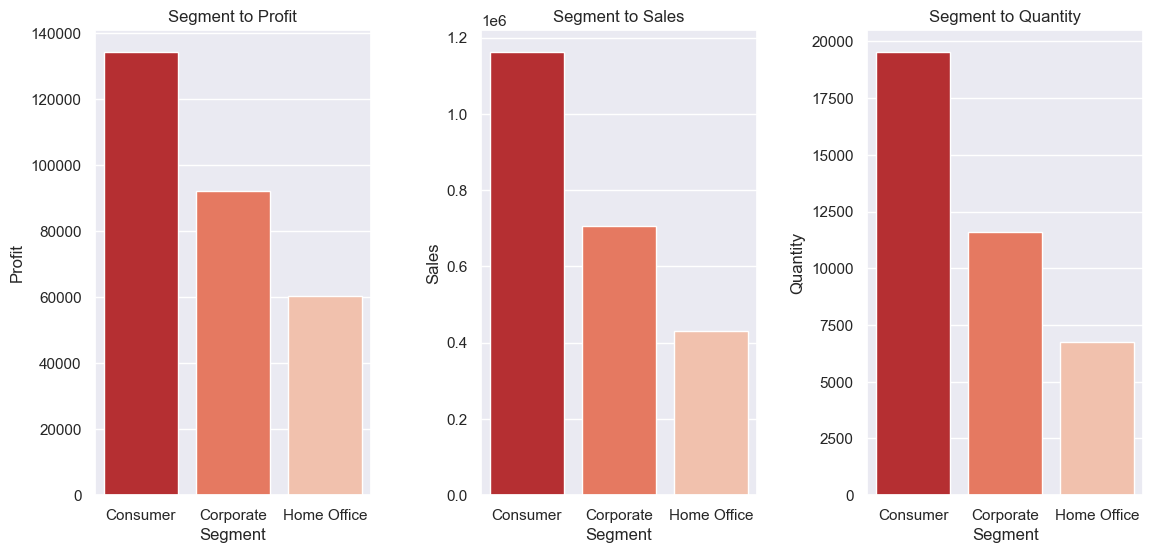

In [17]:
fig, axes = plt.subplots(1,3, figsize=(12,6))

sns.set_theme(style="darkgrid")
axes[0].set_title("Segment to Profit")
axes[1].set_title("Segment to Sales")
axes[2].set_title("Segment to Quantity")

sns.barplot(x=segment_df.index,
           y=segment_df['Profit'],
           data= segment_df,
            palette = 'Reds_r',
           ax= axes[0])

sns.barplot(x=segment_df.index,
           y=segment_df['Sales'],
           data= segment_df,
            palette = 'Reds_r',
           ax= axes[1])

sns.barplot(x=segment_df.index,
           y=segment_df['Quantity'],
           data= segment_df,
            palette = 'Reds_r',
           ax= axes[2])

plt.tight_layout(pad=2);

<b>Consumer segment</b> is most profitable, followed by <b>Corporate Segment</b> and <b>home offices</b>. Hence, marketing strategy has to target or place more focus on retaining consumers.

#### Which Region makes more profit?

In [18]:
region_df = pd.DataFrame(df.groupby(['Region'])[['Profit', 'Sales', 'Quantity']].sum())
region_df

,Profit,Sales,Quantity
Region,,,
Central,39706.3625,501239.8908,8780
East,91522.7800,678781.2400,10618
South,46749.4303,391721.9050,6209
West,108418.4489,725457.8245,12266


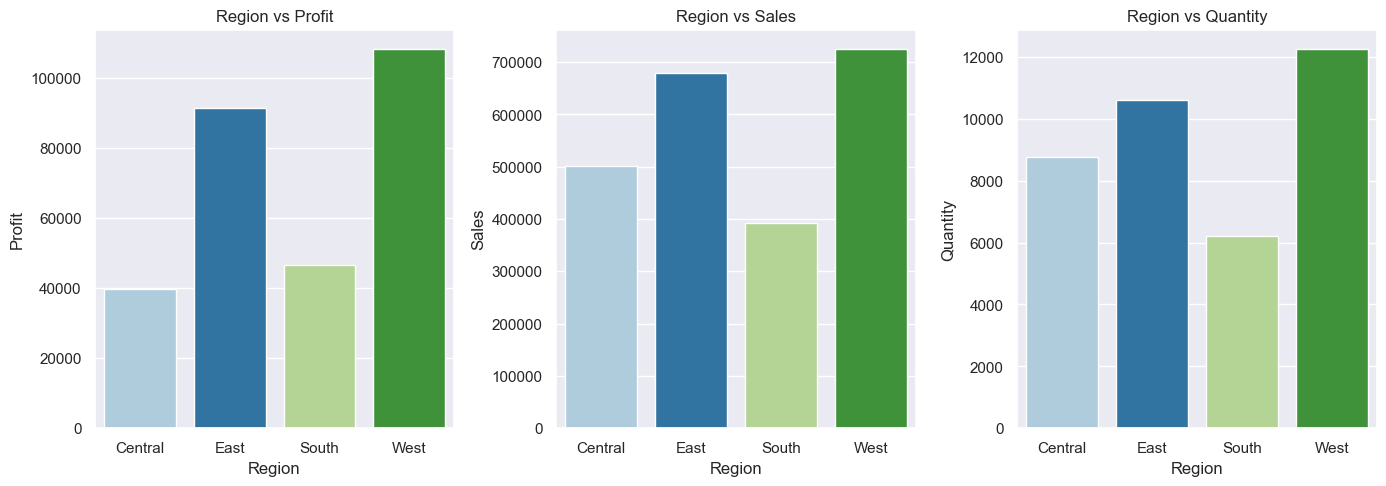

In [19]:
fig, axes = plt.subplots(1,3, figsize=(14,5))

sns.set_theme(style="darkgrid")
axes[0].set_title("Region vs Profit")
axes[1].set_title("Region vs Sales")
axes[2].set_title("Region vs Quantity")

sns.barplot(x=region_df.index,
           y='Profit',
           data=region_df,
           palette='Paired',
           ax=axes[0])

sns.barplot(x=region_df.index,
           y='Sales',
           data=region_df,
           palette='Paired',
           ax=axes[1])

sns.barplot(x=region_df.index,
           y='Quantity',
           data=region_df,
           palette='Paired',
           ax=axes[2])

plt.tight_layout(pad=1);

Among every region, west and east region recorded more profit. So, strategy should focus more on east and west region.

#### Which Category makes most sales?

In [20]:
category_df = pd.DataFrame(df.groupby(['Category'])[['Profit', 'Sales', 'Quantity']].sum())
category_df

,Profit,Sales,Quantity
Category,,,
Furniture,18451.2728,741999.7953,8028
Office Supplies,122490.8008,719047.0320,22906
Technology,145454.9481,836154.0330,6939


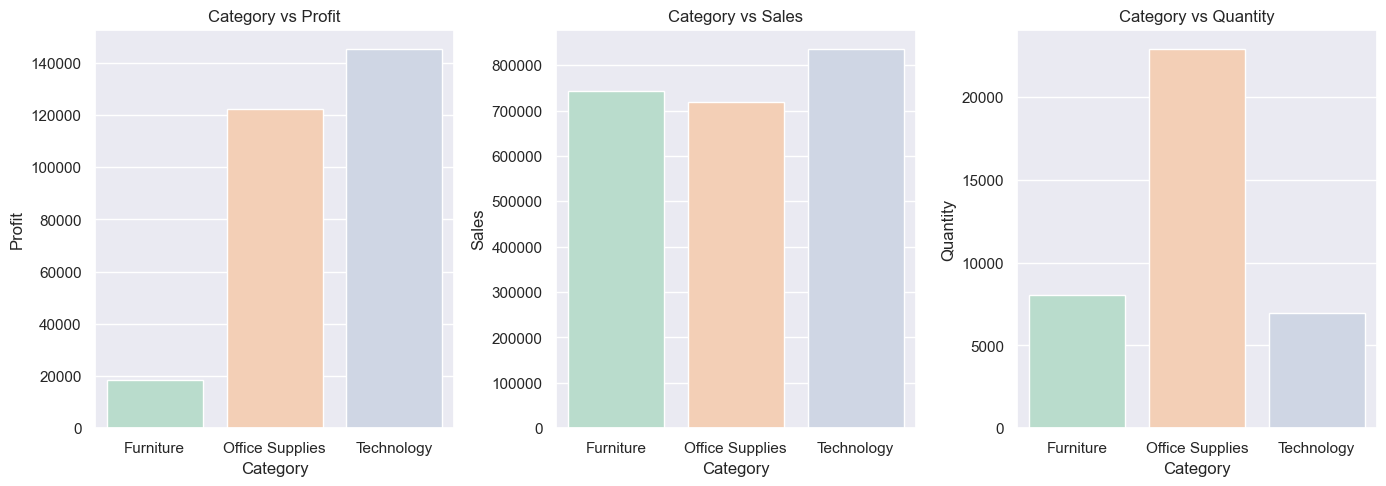

In [21]:
fig, axes = plt.subplots(1,3, figsize=(14,5))

sns.set_theme(style="darkgrid")
axes[0].set_title("Category vs Profit")
axes[1].set_title("Category vs Sales")
axes[2].set_title("Category vs Quantity")

sns.barplot(x=category_df.index,
           y='Profit',
           data=category_df,
           palette='Pastel2',
           ax=axes[0])

sns.barplot(x=category_df.index,
           y='Sales',
           data=category_df,
           palette='Pastel2',
           ax=axes[1])

sns.barplot(x=category_df.index,
           y='Quantity',
           data=category_df,
           palette='Pastel2',
           ax=axes[2])

plt.tight_layout(pad=1);

Though quantity is less, technology seems to have highest sales as well as profit. For more profit, focus should be more on technology.

In [28]:
sub_category_df = pd.DataFrame(df.groupby(['Sub-Category'])[['Profit', 'Sales', 'Quantity']].sum())
sub_category_df

,Profit,Sales,Quantity
Sub-Category,,,
Accessories,41936.6357,167380.3180,2976
Appliances,18138.0054,107532.1610,1729
Art,6527.7870,27118.7920,3000
Binders,30221.7633,203412.7330,5974
Bookcases,-3472.5560,114879.9963,868
...,...,...,...
Paper,34053.5693,78479.2060,5178
Phones,44515.7306,330007.0540,3289
Storage,21278.8264,223843.6080,3158


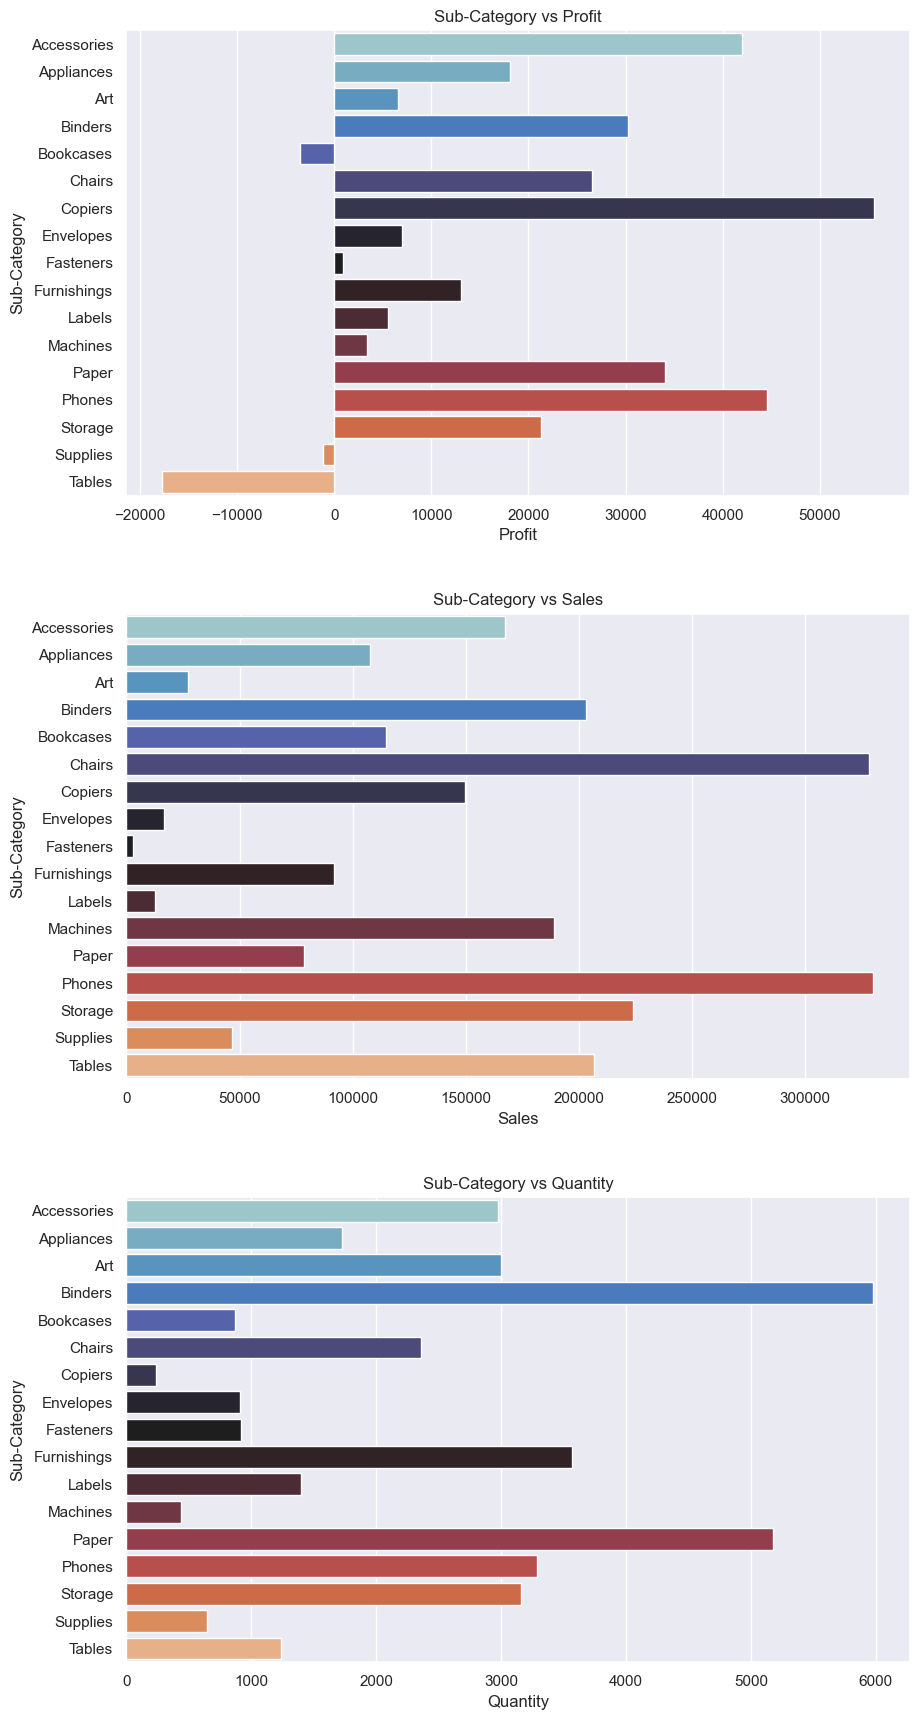

In [29]:
fig, axes = plt.subplots(3,1, figsize=(10,18))

sns.set_theme(style="darkgrid")
axes[0].set_title("Sub-Category vs Profit")
axes[1].set_title("Sub-Category vs Sales")
axes[2].set_title("Sub-Category vs Quantity")

sns.barplot(y=sub_category_df.index,
           x='Profit',
           data=sub_category_df,
           palette='icefire',
           ax=axes[0])

sns.barplot(y=sub_category_df.index,
           x='Sales',
           data=sub_category_df,
           palette='icefire',
           ax=axes[1])

sns.barplot(y=sub_category_df.index,
           x='Quantity',
           data=sub_category_df,
           palette='icefire',
           ax=axes[2])

plt.tight_layout(pad=3);


With analyzing these graphs, we may say that copiers, accesories and phones have more sales and profit.

In [32]:
labels = df.groupby('Region')['Profit'].sum().index
values = df.groupby('Region')['Profit'].sum().values
colors = sns.color_palette('pastel')[0:4]

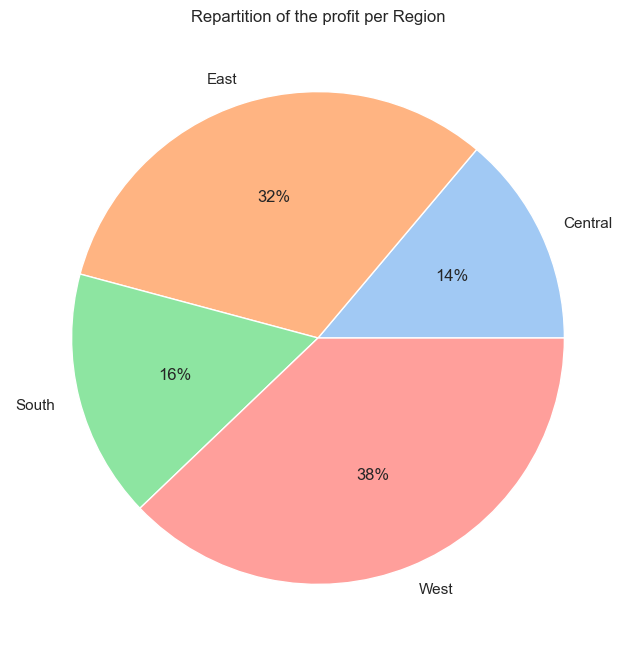

In [33]:

plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the profit per Region")
plt.show()

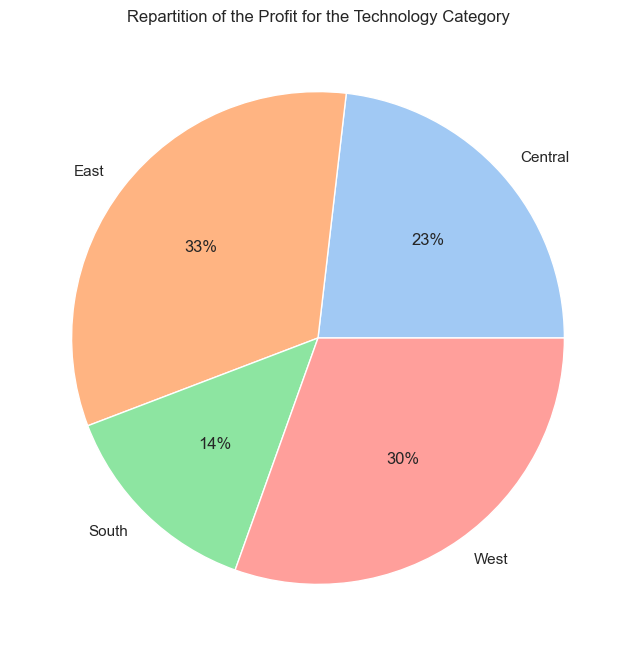

In [34]:
A = df[df['Category'] == 'Technology']

labels = A.groupby('Region')['Profit'].sum().index
values = A.groupby('Region')['Profit'].sum().values

plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the Profit for the Technology Category")
plt.show()

Categorizing profit by region, we have the East region with the highest profit (33%) and the South region with the least profit (14%).

#### Which Sub-category makes most sales?

In [35]:
sub_category_df = pd.DataFrame(df.groupby(['Sub-Category'])[['Profit', 'Sales', 'Quantity']].sum())
sub_category_df

,Profit,Sales,Quantity
Sub-Category,,,
Accessories,41936.6357,167380.3180,2976
Appliances,18138.0054,107532.1610,1729
Art,6527.7870,27118.7920,3000
Binders,30221.7633,203412.7330,5974
Bookcases,-3472.5560,114879.9963,868
...,...,...,...
Paper,34053.5693,78479.2060,5178
Phones,44515.7306,330007.0540,3289
Storage,21278.8264,223843.6080,3158


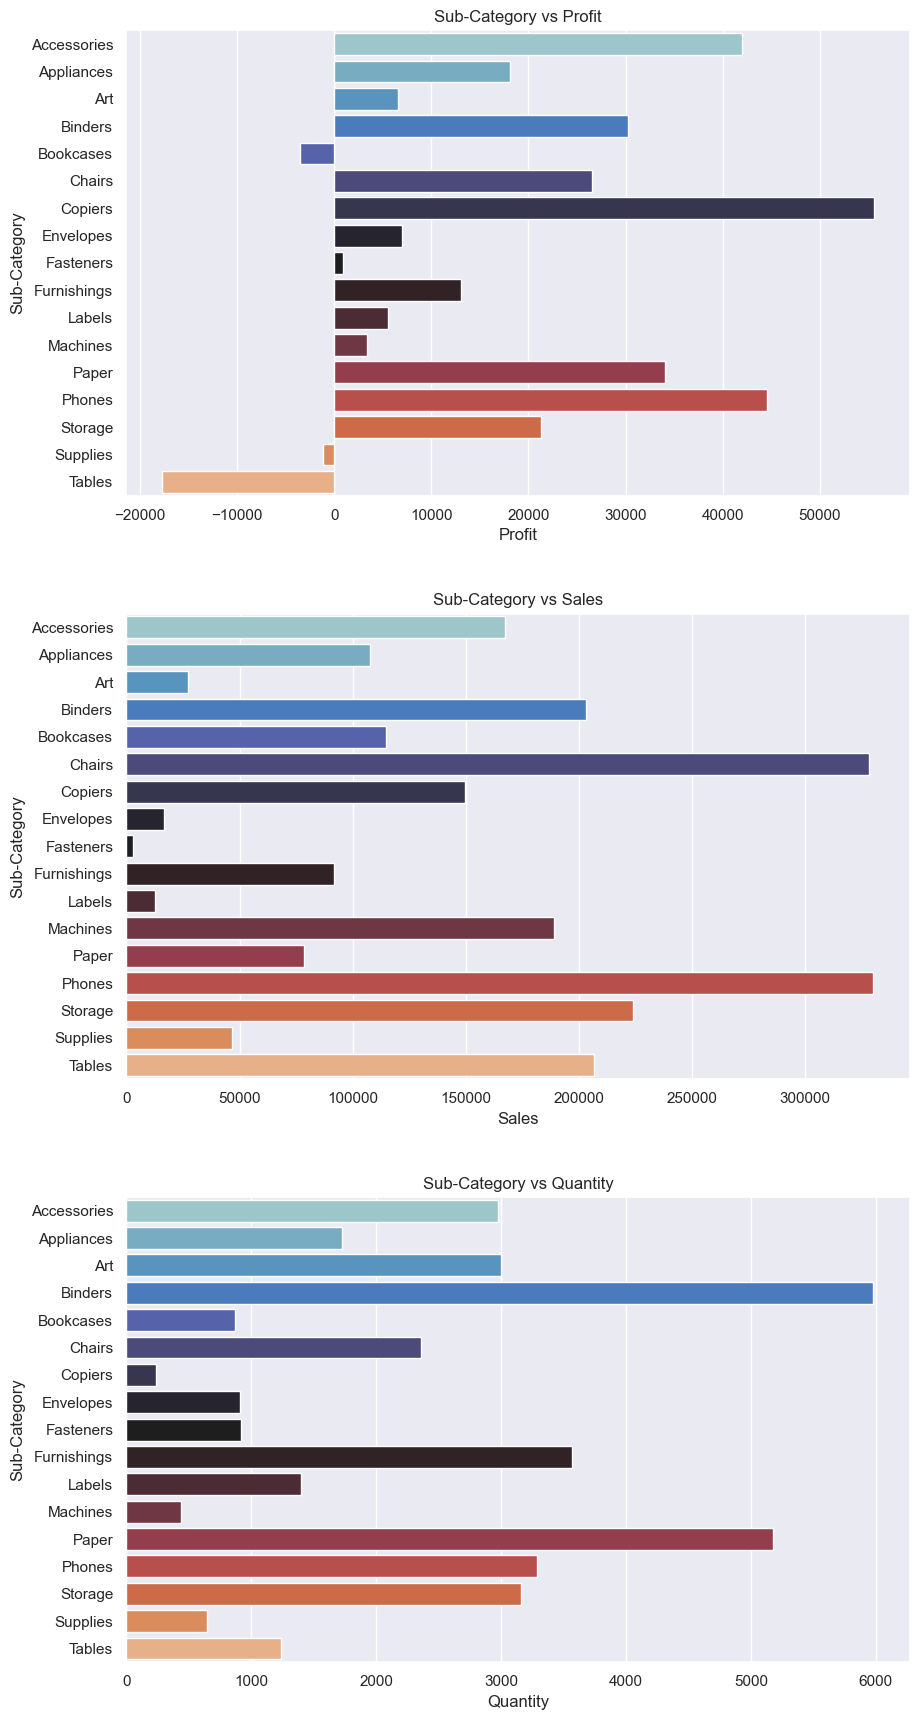

In [36]:
fig, axes = plt.subplots(3,1, figsize=(10,18))

sns.set_theme(style="darkgrid")
axes[0].set_title("Sub-Category vs Profit")
axes[1].set_title("Sub-Category vs Sales")
axes[2].set_title("Sub-Category vs Quantity")

sns.barplot(y=sub_category_df.index,
           x='Profit',
           data=sub_category_df,
           palette='icefire',
           ax=axes[0])

sns.barplot(y=sub_category_df.index,
           x='Sales',
           data=sub_category_df,
           palette='icefire',
           ax=axes[1])

sns.barplot(y=sub_category_df.index,
           x='Quantity',
           data=sub_category_df,
           palette='icefire',
           ax=axes[2])

plt.tight_layout(pad=3);

With analyzing these graphs, we may say that copiers, accessories and phones have more sales and profit.

#### Which city is preferable for business?

In [37]:
cities_df = pd.DataFrame(df.groupby(['City'])[['Profit', 'Sales', 'Quantity']].sum().sort_values('Profit',ascending = False))
top10 = cities_df.head(10)
last10 = cities_df.tail(10)

In [38]:
# Appending the last 10 to the top 10 Cities to a single variable “high_low”.
high_low = top10.append(last10)

/var/folders/6x/sp_vy0g12kv_vw9114lrmss40000gn/T/ipykernel_6770/2457305397.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  high_low = top10.append(last10)


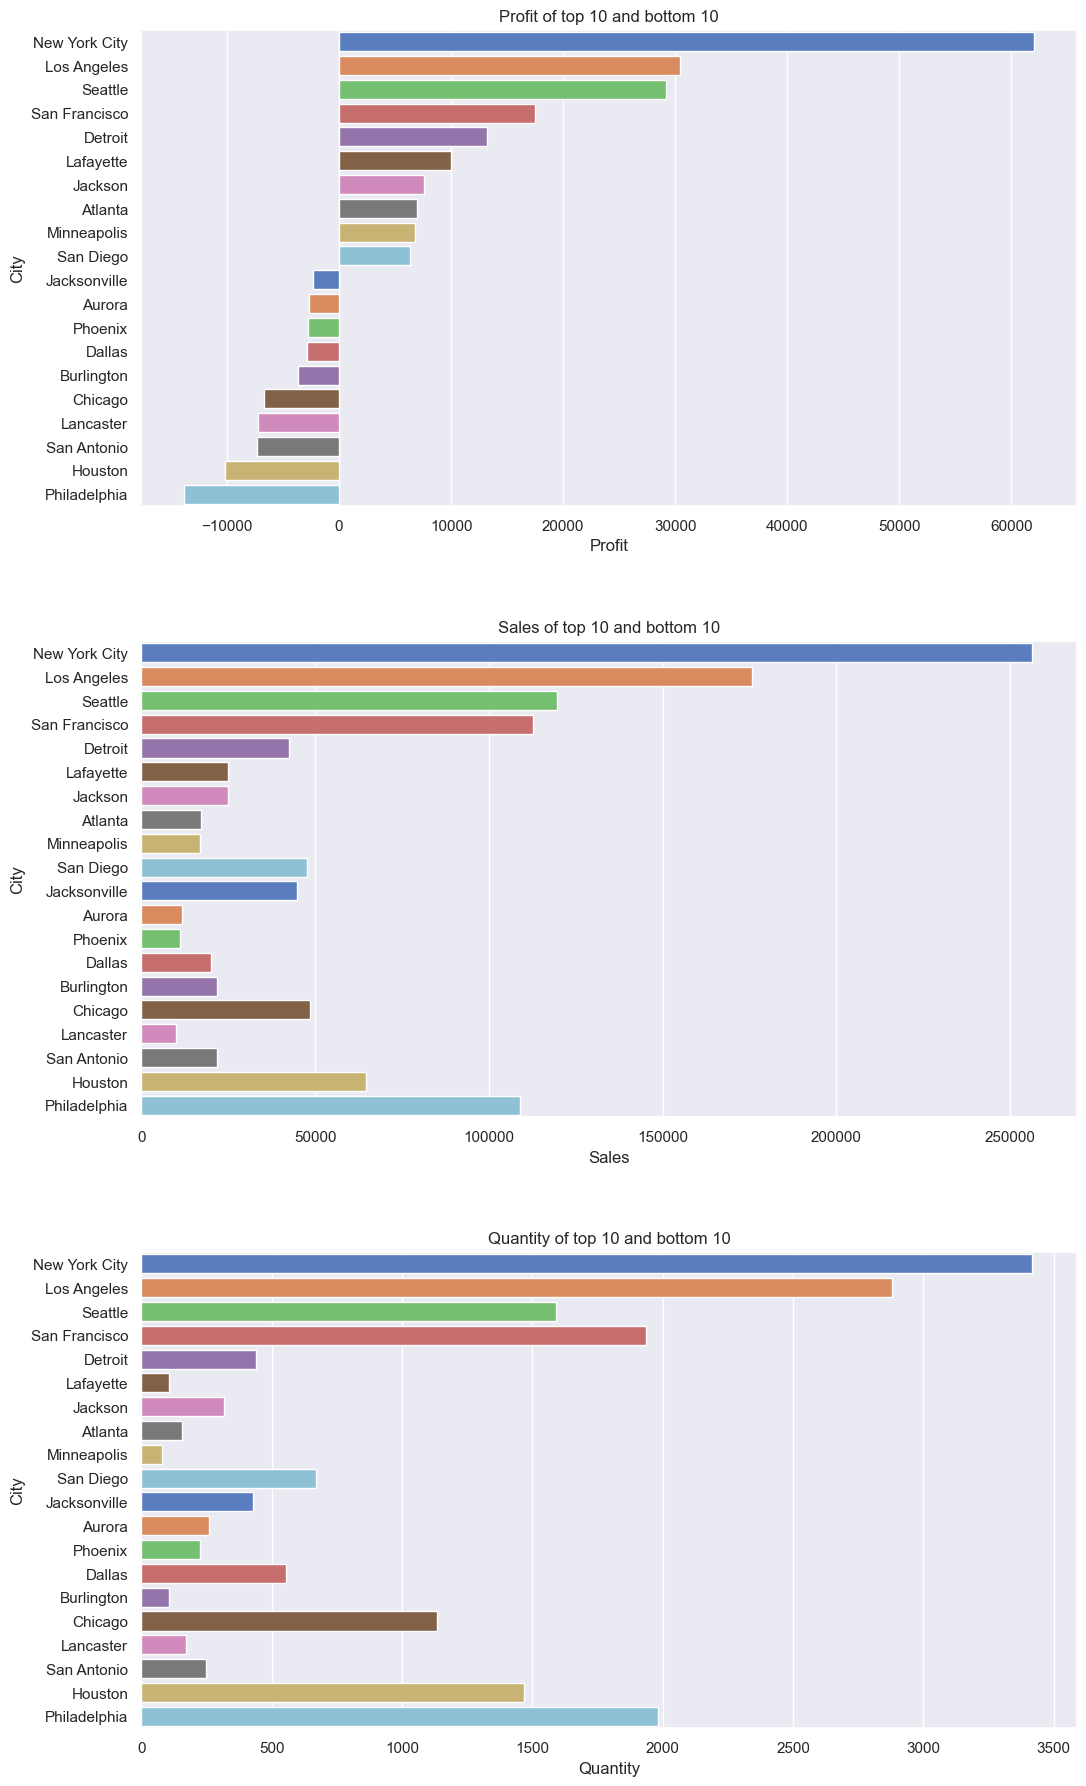

In [39]:
fig, axes = plt.subplots(3,1, figsize=(12, 19))

axes[0].set_title("Profit of top 10 and bottom 10")
axes[1].set_title("Sales of top 10 and bottom 10")
axes[2].set_title("Quantity of top 10 and bottom 10")

sns.barplot(y=high_low.index,
           x='Profit',
           data=high_low,
           palette='muted',
           ax=axes[0])

sns.barplot(y=high_low.index,
           x='Sales',
           data=high_low,
           palette='muted',
           ax=axes[1])

sns.barplot(y=high_low.index,
           x='Quantity',
           data=high_low,
           palette='muted',
           ax=axes[2])

plt.tight_layout(pad=4);

New York have the most sales and profit.
With a fairly high quantity and sales at Philadelphia, Houston and Chicago, profit at these places is in negative.
There is a huge disparity between the cities with highest sales and lowest sales. Marketing strategy has to target the top 10 cities.

## Summary

- Standard class ship-mode is more preferred.
- Consumer segment is most profitable, followed by Corporate Segment and home offices.
- West and east regions recorded more profit.
technology seems to have highest sales as well as profit.
- The East region with the highest profit (33%) and the South region with the least profit (14%).
copiers, accessories and phones have more sales and profit.
- Most sales and profit where made by New York.

## Insights and Recommendation

- Focus on Technology categories like copiers, accessories and phones as they are highest selling and most profitable.
- Selling bookcases, tables and supplies result in losses, so I suggest Superstores to Consider bundling them together with High Profitable sub-category like copiers, accessories etc.
- Home Office customer might be too busy with work and less likely to spend time selecting products individually, so I recommend creating a Home Office Catalog with products used for offices such as paper, chairs, phone, copiers, storage, machines would result in better profits.
- I strongly Suggest consumers from East and West regions of top 10 cities with most profits to be targeted with special promotions and advertisements for copiers, accessories and phones.
- Among every region, west and east region recorded more profit. So, strategy should focus more on east and west region.